In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
hr = pd.read_csv('HR.csv')

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Перед выполнением задания создадим копию датафрейма с цифрами в колонках sales и salary**

In [7]:
def find_max(dictionary):
    """
    The function helps to generate dictionary key - integer value by finding the previous number assigned    
    """
    max = 0
    for value in dictionary.values():
        if value > max: 
            max = value
    
    return max

def normalize(value):
    global dictionary
    if value not in dictionary :
        dictionary[value] = find_max(dictionary) + 1
    
    return dictionary[value]

hr_norm = hr

dictionary = dict()

hr_norm['sales_no'] = hr_norm['sales'].apply(normalize)
sales_no = dictionary #сохраняем словари для дальнейщего понимания

dictionary = dict()

hr_norm['salary_no'] = hr_norm['salary'].apply(normalize)
salary_no = dictionary

In [8]:
sales_no

{'sales': 1,
 'accounting': 2,
 'hr': 3,
 'technical': 4,
 'support': 5,
 'management': 6,
 'IT': 7,
 'product_mng': 8,
 'marketing': 9,
 'RandD': 10}

In [9]:
salary_no

{'low': 1, 'medium': 2, 'high': 3}

In [10]:
#Делаем копию датафрейма с числовыми значениями
hr_norm = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales_no', 'salary_no']]

In [11]:
hr_norm

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_no,salary_no
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,5,1
14995,0.37,0.48,2,160,3,0,1,0,5,1
14996,0.37,0.53,2,143,3,0,1,0,5,1
14997,0.11,0.96,6,280,4,0,1,0,5,1


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [12]:
hr_norm.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales_no                   4.339823
salary_no                  1.594706
dtype: float64

In [13]:
hr_norm.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
sales_no                   4.00
salary_no                  2.00
dtype: float64

In [14]:
hr_norm.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_no,salary_no
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
hr_norm.min()

satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_montly_hours     96.00
time_spend_company        2.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
sales_no                  1.00
salary_no                 1.00
dtype: float64

In [16]:
hr_norm.max()

satisfaction_level         1.0
last_evaluation            1.0
number_project             7.0
average_montly_hours     310.0
time_spend_company        10.0
Work_accident              1.0
left                       1.0
promotion_last_5years      1.0
sales_no                  10.0
salary_no                  3.0
dtype: float64

In [17]:
hr_norm.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
sales_no                  2.820837
salary_no                 0.637183
dtype: float64

**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

In [18]:
hr_norm.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_no,salary_no
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales_no,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary_no,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


In [19]:
import seaborn as sns

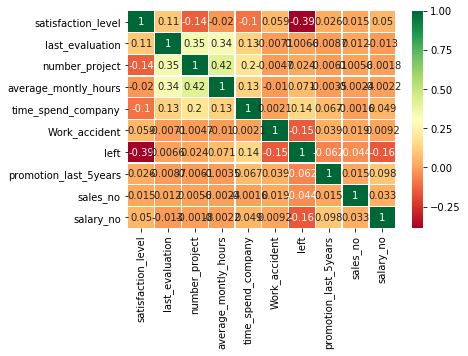

In [20]:
sns.heatmap(hr_norm.corr(),annot=True,cmap='RdYlGn',linewidths=0.3) 

#fix heatmap cropped. Source: https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() 

**4. Визуализировать несколько взаимосвязей между переменными.**

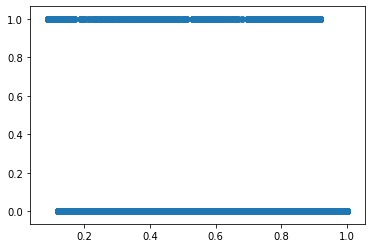

In [21]:
plt.scatter(hr['satisfaction_level'], hr['left'])

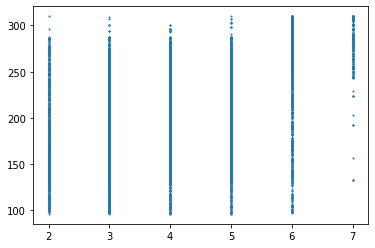

In [22]:
plt.scatter(hr['number_project'], hr['average_montly_hours'], s=1)

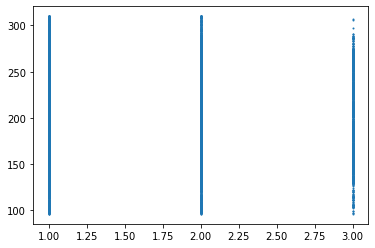

In [23]:
plt.scatter(hr['salary_no'], hr['average_montly_hours'], s=1)

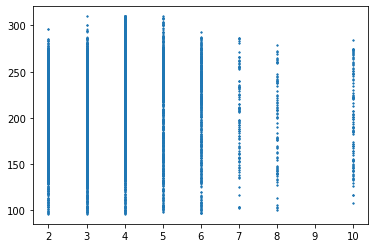

In [24]:
plt.scatter(hr['time_spend_company'], hr['average_montly_hours'], s=1)

На втором году жизни компании никого не набирали?)

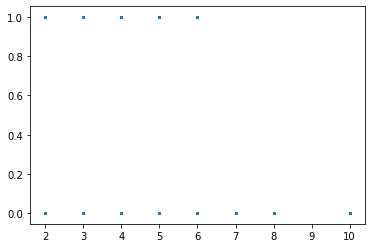

In [25]:
plt.scatter(hr['time_spend_company'], hr['left'], s=1)

В целом конечно тяжко визуализировать зависимости дискретных значений. Визуализируем все зависимости.

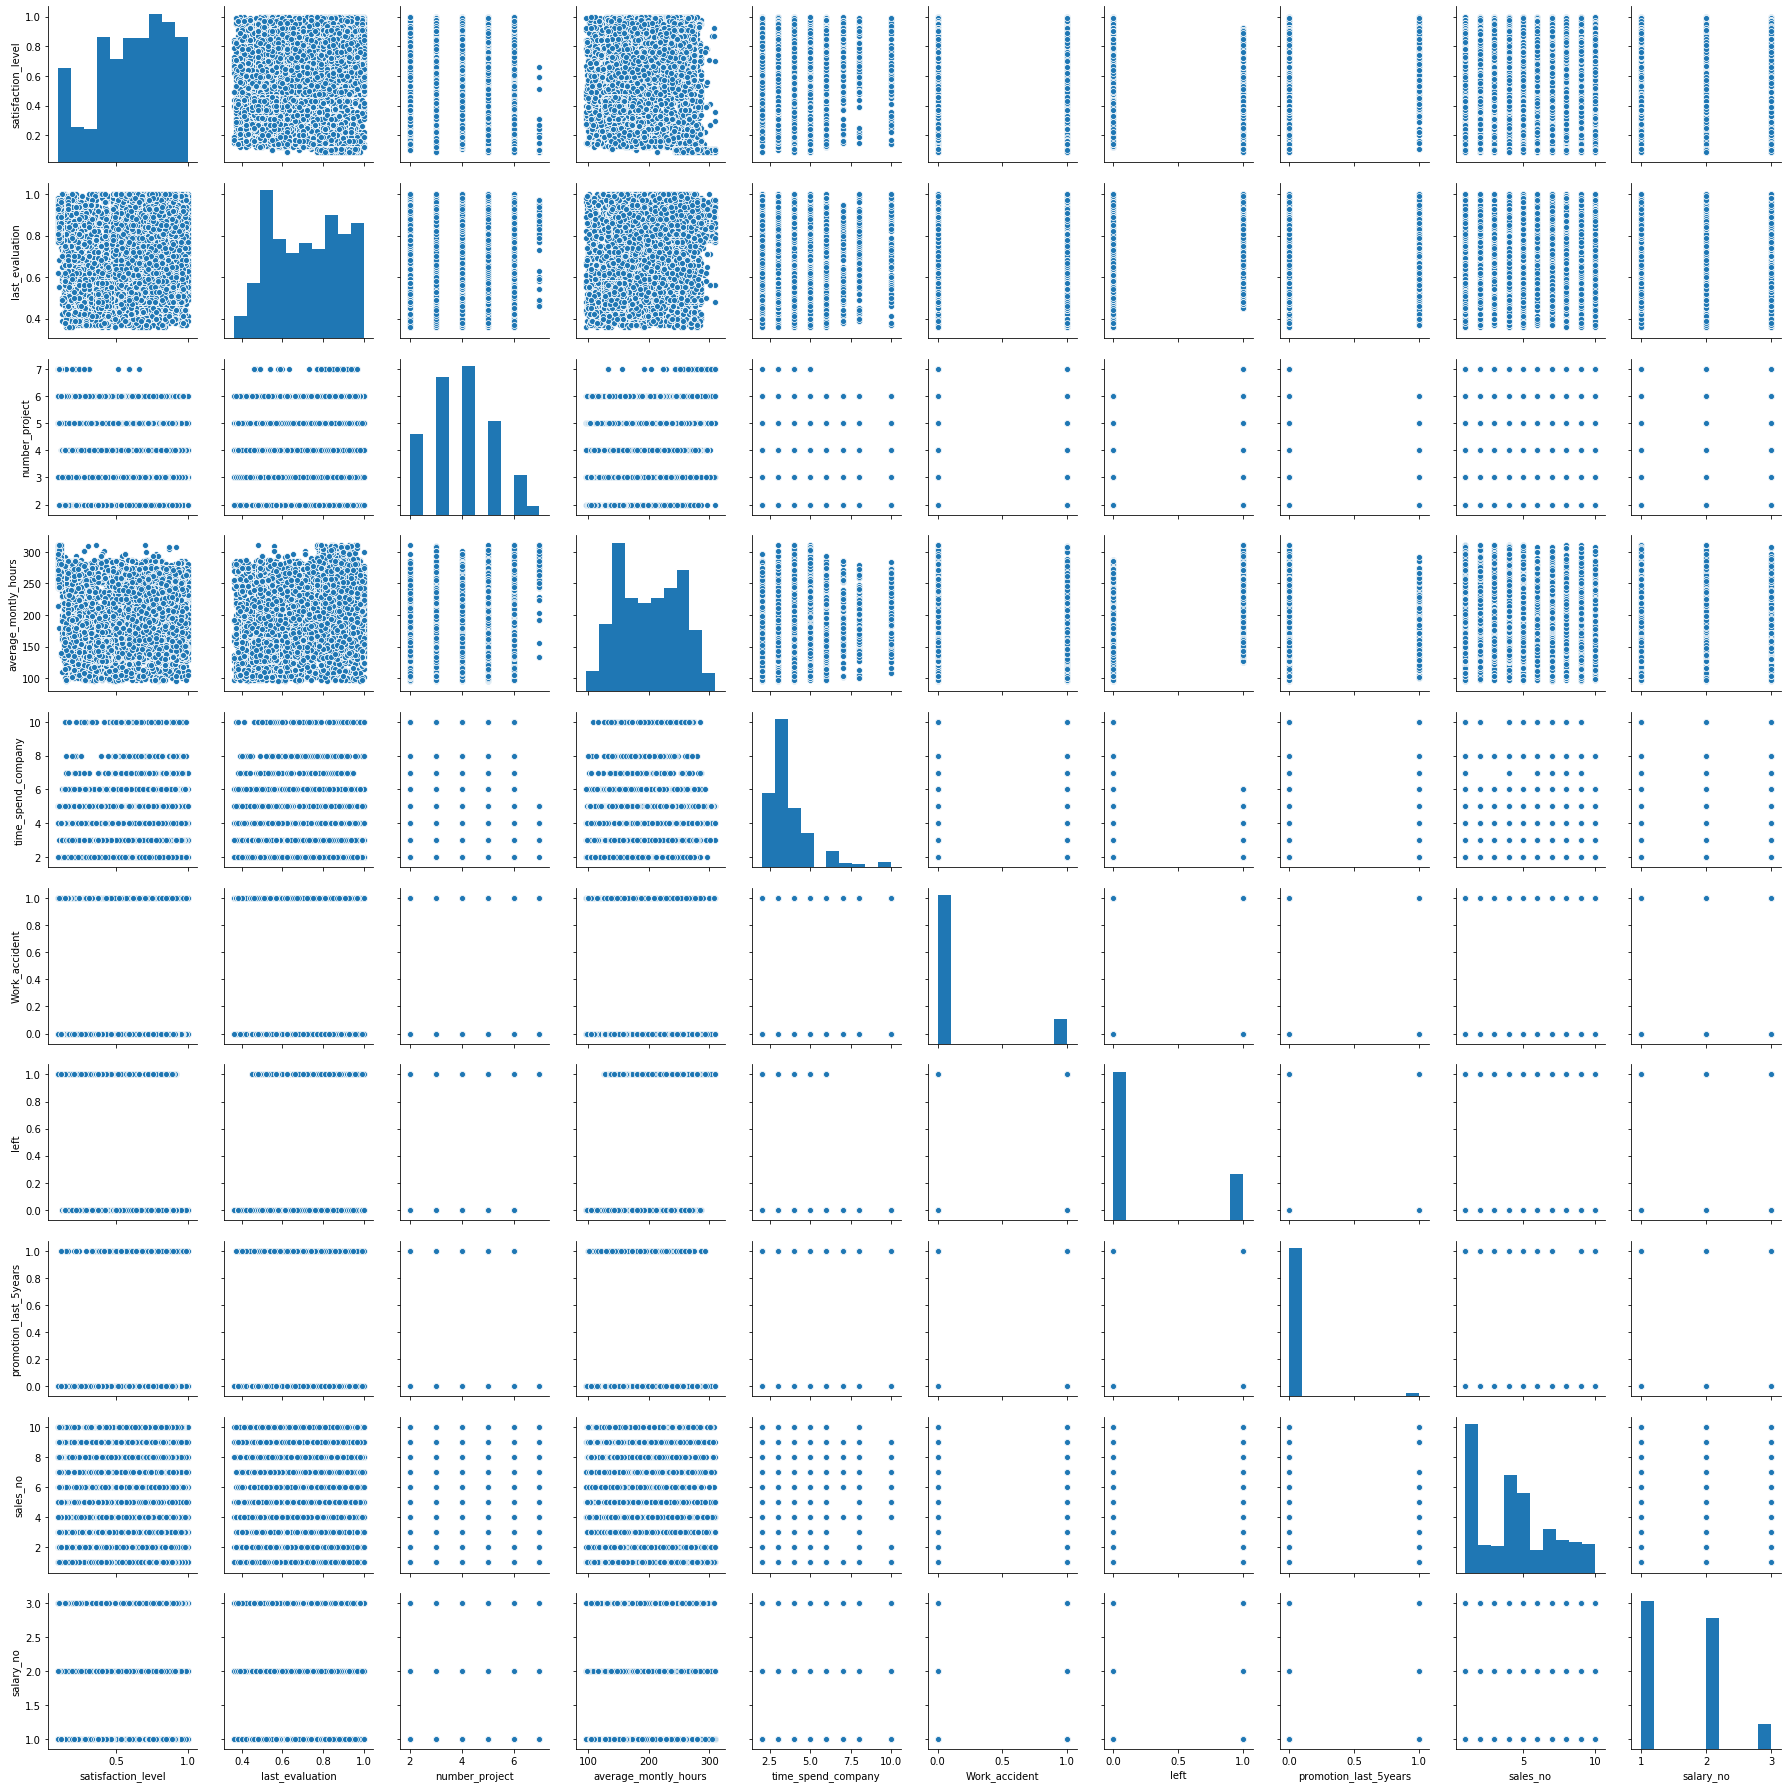

In [26]:
sns.pairplot(hr_norm)

В таком представлении корреляции вообще трудно обнаружить.

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [27]:
from scipy import stats

In [28]:
check_t = hr_norm[hr_norm['sales_no'] == 1] #Возьмем выборку только по отделу продаж и проверим значимость по зп
stats.ttest_ind(check_t['salary_no'], hr_norm['salary_no'])

Ttest_indResult(statistic=-3.3098595603848584, pvalue=0.0009351526806756691)

Выборка по отделу продаж статистически не значима при определения уровня зп

In [29]:
stats.ttest_ind(check_t['average_montly_hours'], hr_norm['average_montly_hours'])

Ttest_indResult(statistic=-0.15877397634902668, pvalue=0.873848627970269)

Но значима при определении среднего количества отработанных в месяц часов.

In [30]:
stats.ttest_ind(check_t['left'], hr_norm['left'])

Ttest_indResult(statistic=0.9134612973624068, pvalue=0.3610114877099103)

и для определения возможности уйти из компании.

In [31]:
check_t = hr_norm[hr_norm['time_spend_company'] == 10] #Возьмем выборку только тех, кто отработал в компании 10 лет
stats.ttest_ind(check_t['salary_no'], hr_norm['salary_no'])

Ttest_indResult(statistic=10.064408611195269, pvalue=9.418105513009077e-24)

Также статически незначима для определния уровня зарплат

In [32]:
stats.ttest_ind(check_t['sales_no'], hr_norm['sales_no'])

Ttest_indResult(statistic=0.7535737055306538, pvalue=0.4511169020199228)

Среди долгожителей компании есть представители всех отделов, причем они распеределены как и недолгожители компании.

In [33]:
stats.ttest_ind(check_t['left'], hr_norm['left'])

Ttest_indResult(statistic=-8.176889831017721, pvalue=3.1408645383962613e-16)

Долгожители по вероятности ухода отличаются от сотрудников в целом.

**6. Рассчитать сколько работников работает в каждом департаменте.**

In [34]:
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

**7. Показать распределение сотрудников по зарплатам.**

In [35]:
salary = pd.DataFrame(hr.salary.value_counts()).reset_index()
salary

,index,salary
0,low,7316
1,medium,6446
2,high,1237


<BarContainer object of 3 artists>

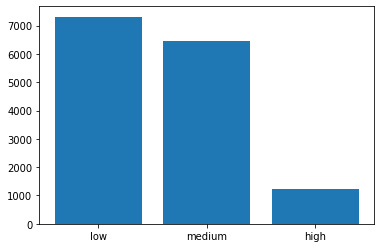

In [36]:
plt.bar(salary['index'], salary['salary'])

**8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

In [37]:
salary2 = hr.groupby(['sales', 'salary']).agg({'left': 'count'})
salary2.reset_index(inplace = True)
salary2

,sales,salary,left
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

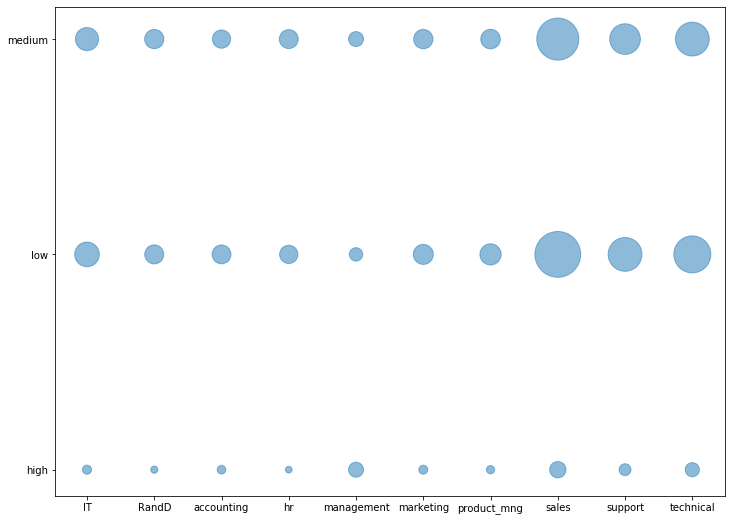

In [39]:
x = salary2['sales']
y = salary2['salary']
z = salary2['left']

plt.scatter(x, y, s = z, alpha = 0.5)
plt.show()

**9. Сколько сотрудников покинули компанию.**

In [40]:
left = hr[hr['left'] == 1]
left = left['left'].count()
print(f'Количество покинувших компанию сотрудников {left}')

Количество покинувших компанию сотрудников 3571


**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

Проверим вероятности ухода для разных отделов компании.

In [56]:
from scipy.stats import spearmanr

In [55]:
for key in hr['sales_no'].value_counts().to_dict().keys() :
    
    #Будем использовать тест Спирмена
    stat, p = spearmanr(hr[hr['sales_no'] == key][''], data['thalach'])
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

1 4140
4 2720
5 2229
7 1227
8 902
9 858
10 787
2 767
3 739
6 630


Для начала по-новому разметим dataset применив onehotencoding для sales и salary

In [42]:
hr_ohe = pd.get_dummies(hr, prefix_sep='_', drop_first=True)

In [43]:
hr_ohe.drop('sales_no', axis=1, inplace = True)

In [44]:
hr_ohe.drop('salary_no', axis=1, inplace = True)

In [45]:
hr_ohe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [61]:
def print_spear(stat, p):
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
        if stat > 0 :
            print('Positive correlation')
        else :
            print('Negative correlation')
    

In [62]:
#Будем использовать тест Спирмена

stat, p = spearmanr(hr_ohe['sales_RandD'], hr_ohe['left'])

print_spear(stat, p)

stat=-0.047, p=0.000
Probably dependent
Negative correlation


In [65]:
stat, p = spearmanr(hr_ohe['sales_accounting'], hr_ohe['left'])

print_spear(stat, p)

stat=0.015, p=0.063
Probably independent


In [66]:
stat, p = spearmanr(hr_ohe['sales_hr'], hr_ohe['left'])

print_spear(stat, p)

stat=0.028, p=0.001
Probably dependent
Positive correlation


In [67]:
stat, p = spearmanr(hr_ohe['sales_management'], hr_ohe['left'])

print_spear(stat, p)

stat=-0.046, p=0.000
Probably dependent
Negative correlation


In [68]:
stat, p = spearmanr(hr_ohe['sales_marketing'], hr_ohe['left'])

print_spear(stat, p)

stat=-0.001, p=0.916
Probably independent


In [69]:
stat, p = spearmanr(hr_ohe['sales_product_mng'], hr_ohe['left'])

print_spear(stat, p)

stat=-0.011, p=0.177
Probably independent


In [72]:
stat, p = spearmanr(hr_ohe['sales_sales'], hr_ohe['left'])

print_spear(stat, p)

stat=0.010, p=0.224
Probably independent


In [71]:
stat, p = spearmanr(hr_ohe['sales_support'], hr_ohe['left'])

print_spear(stat, p)

stat=0.011, p=0.190
Probably independent


In [70]:
stat, p = spearmanr(hr_ohe['sales_technical'], hr_ohe['left'])

print_spear(stat, p)

stat=0.020, p=0.014
Probably dependent
Positive correlation


Итого, можно говорить, что принадлежность работника к некоторым отделам влияет на их (не)желание уйти из компании, а именно:
* Уменьшает вероятность ухода: RandD, managment 
* Увеличивает вероятность ухода: HR, techincal

In [74]:
# Продолжим проверку через ранговую корреляцию Кендалла
from scipy.stats import kendalltau

In [75]:
stat, p = kendalltau(hr['satisfaction_level'], hr['left'])

print_spear(stat, p)

stat=-0.301, p=0.000
Probably dependent
Negative correlation


In [76]:
stat, p = kendalltau(hr['last_evaluation'], hr['left'])

print_spear(stat, p)

stat=-0.002, p=0.765
Probably independent


In [77]:
stat, p = kendalltau(hr['number_project'], hr['left'])

print_spear(stat, p)

stat=-0.018, p=0.017
Probably dependent
Negative correlation


In [78]:
stat, p = kendalltau(hr['average_montly_hours'], hr['left'])

print_spear(stat, p)

stat=0.038, p=0.000
Probably dependent
Positive correlation


In [79]:
stat, p = kendalltau(hr['time_spend_company'], hr['left'])

print_spear(stat, p)

stat=0.245, p=0.000
Probably dependent
Positive correlation


In [90]:
stat, p = kendalltau(hr['promotion_last_5years'], hr['left'])
print_spear(stat, p)

stat=-0.062, p=0.000
Probably dependent
Negative correlation


In [91]:
stat, p = kendalltau(hr['Work_accident'], hr['left'])
print_spear(stat, p)

stat=-0.155, p=0.000
Probably dependent
Negative correlation


Итого
* Уменьшает вероятность ухода: satisfaction_level, number_project, promotion_last_5years, Work_accident (внезапно да? то есть человек, который попадал в происшествия на рабочем месте уйдет с меньшей вероятностью)
* Увеличивает вероятность ухода: average_montly_hours, time_spend_company

In [83]:
# Продолжим проверку категориальных переменных с помощью ХИ-квадрат
from scipy.stats import chi2_contingency

In [ ]:
Work_accident	left	promotion_last_5years	sales_no	salary_no

In [86]:
hr['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [88]:
stat, p, dof, expected = chi2_contingency(hr[['salary_no', 'left']])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=9569.552, p=1.000
Probably independent


Задание завершено, но дух исследователя не дает покоя, давайте проверим несколько линейных регрессий на предсказательную силу. Для начала возьмем все параметры, потом только те, где в 10м пункте была обнаружена корреляция, и потом только один с наибольшей корреляцией. 

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [95]:
X = hr_ohe.drop('left', axis = 1) #Берем все переменные в модель
y = hr_ohe['left']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 3
)

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.22461330542405478

In [116]:
print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

Weights: [-6.34896172e-01  8.17725944e-02 -3.39132337e-02  6.18149667e-04
  3.60201814e-02 -1.58243583e-01 -1.21398248e-01 -5.19555456e-02
  2.88013285e-02  7.42052553e-02 -2.21182708e-02  3.82466134e-02
  3.82763338e-03  2.94608477e-02  4.54665973e-02  4.17807663e-02
  2.01775402e-01  1.22815662e-01]
Bias: 0.2939444267059575


In [102]:
# Будем использовать ту же разбивку на тренировчные и тестовые данные

X_tn = X_train[['sales_RandD', 'sales_management', 'sales_hr', 'sales_technical', 'satisfaction_level', 'number_project', 'promotion_last_5years', 'Work_accident', 'average_montly_hours', 'time_spend_company']]
X_tt = X_test[['sales_RandD', 'sales_management', 'sales_hr', 'sales_technical', 'satisfaction_level', 'number_project', 'promotion_last_5years', 'Work_accident', 'average_montly_hours', 'time_spend_company']]

In [105]:
model = LinearRegression()
model.fit(X_tn, y_train)
predicted_y = model.predict(X_tt)
model.score(X_tt, y_test)

0.20974693581372583

Модель стала еще хуже

In [106]:
print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

Weights: [-0.08104409 -0.09616934  0.04450694  0.01376526 -0.63533241 -0.03056304
 -0.14685356 -0.15999966  0.00068299  0.03528139]
Bias: 0.5115458503436512


In [111]:
X_tn = X_train['satisfaction_level'].values.reshape(-1,1) #Надо сделать reshape так как линейная регрессия ожидает двумерный массив на входе
X_tt = X_test['satisfaction_level'].values.reshape(-1,1) 

In [112]:
model = LinearRegression()
model.fit(X_tn, y_train)
predicted_y = model.predict(X_tt)
model.score(X_tt, y_test)

0.16787218963774053

Совсем плохо, то есть все-таки модель на всех параметрах отработала лучше, с другой стороны мне кажется что вторая модель даст меньше шума.

In [113]:
print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

Weights: [-0.65585983]
Bias: 0.6389825081719618
